In [274]:
import numpy as np
import pandas as pd
import seaborn as sns

In [275]:
data = pd.read_csv(r"C:\Users\kalya\Desktop\Study material\DATA CLEANING\online_sex_work.csv",low_memory=False, header = 0)

In [276]:
data = data.iloc[:28831,:]

In [277]:
data.isna().sum()

User_ID                                    0
Gender                                     4
Age                                        0
Location                                   1
Verification                               0
Sexual_orientation                         1
Sexual_polarity                            1
Looking_for                              425
Points_Rank                                0
Last_login                                 0
Member_since                               0
Number_of_Comments_in_public_forum         0
Time_spent_chating_H:M                     0
Number_of_advertisments_posted             0
Number_of_offline_meetings_attended        0
Profile_pictures                           0
Friends_ID_list                        25518
Risk                                       0
dtype: int64

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 18 columns):
User_ID                                28831 non-null float64
Gender                                 28827 non-null object
Age                                    28831 non-null object
Location                               28830 non-null object
Verification                           28831 non-null object
Sexual_orientation                     28830 non-null object
Sexual_polarity                        28830 non-null object
Looking_for                            28406 non-null object
Points_Rank                            28831 non-null object
Last_login                             28831 non-null object
Member_since                           28831 non-null object
Number_of_Comments_in_public_forum     28831 non-null object
Time_spent_chating_H:M                 28831 non-null object
Number_of_advertisments_posted         28831 non-null float64
Number_of_offline_meetings_attended

### Gender

In [279]:
data.Gender.unique()

array(['male', 'female', nan], dtype=object)

In [280]:
data.Gender.value_counts(dropna = False)

male      22382
female     6445
NaN           4
Name: Gender, dtype: int64

In [281]:
data[['Gender','Sexual_orientation','Looking_for']][:5]

,Gender,Sexual_orientation,Looking_for
0,male,Homosexual,Men
1,male,Heterosexual,Women
2,male,Heterosexual,Women
3,male,Heterosexual,Women
4,male,Heterosexual,Women


In [282]:
data.Looking_for.value_counts(dropna = False)

Nobody              19928
Women                4896
Nobody_but_maybe     1512
Men_and_Women        1074
Men                   996
NaN                   425
Name: Looking_for, dtype: int64

In [283]:
data.Sexual_orientation.value_counts(dropna = False)

Heterosexual    20441
bisexual         4391
bicurious        2992
Homosexual       1006
NaN                 1
Name: Sexual_orientation, dtype: int64

In [284]:
data[data['Verification'] == 'Administrator']

,User_ID,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Friends_ID_list,Risk
89,1.0,male,"32,4",J,Administrator,NaN,NaN,Nobody,664,before_1_days,10.5.2009,1 275,271:14,0.0,0.0,0.0,"6597,5245,19410,4813,4808,21557,6493,225",High_risk


Deleting administrator data from database

In [285]:
data = data.drop(index = 89)

In [286]:
def reseting_Gender(row):
    if row['Sexual_orientation'] == 'Homosexual':
        if row['Gender'] == 'female':
            row['Looking_for'] = 'Women'
        if row['Gender'] == 'male':
            row['Looking_for'] = 'Men'
    if row['Sexual_orientation'] == 'Heterosexual':
        if row['Gender'] == 'female':
            row['Looking_for'] = 'Men'
        if row['Gender'] == 'male':
            row['Looking_for'] = 'Women'
    return row

In [287]:
data = data.apply(reseting_Gender, axis = 1)

In [288]:
data[data.Sexual_orientation == 'Heterosexual']

,User_ID,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Friends_ID_list,Risk
1,14.0,male,"32,2",J,Non_Verified,Heterosexual,Dominant,Women,518,before_1_days,1.11.2009,710,3:45,9.0,0.0,0.0,"11778,32024,43768,23969,27318,45884,31277",No_risk
2,16721.0,male,"33,6",K,Non_Verified,Heterosexual,Dominant,Women,150,before_3_days,1.4.2013,25,2:15,1.0,1.0,45.0,"19805,21721,19802",No_risk
3,16957.0,male,34,H,Non_Verified,Heterosexual,Dominant,Women,114,before_4_days,8.4.2013,107,359:22,1.0,0.0,1.0,"40847,38183,9507,42259,5807,28118,24848,37170,...",No_risk
4,17125.0,male,"39,5",B,Non_Verified,Heterosexual,Dominant,Women,497,before_5_days,14.4.2013,600,0:21,0.0,6.0,8.0,"1320,35739,34231,19097,20197,18069,12330,43342...",No_risk
5,17220.0,female,"47,8",A,Non_Verified,Heterosexual,Dominant,Men,127,before_1_days,19.4.2013,159,1 436:52,1.0,9.0,0.0,"23178,22033,9547,30606,15355,9507,17023,2593,1...",No_risk
7,1750.0,male,51,L,Non_Verified,Heterosexual,Dominant,Women,38,before_9_days,22.10.2010,91,0:5,0.0,0.0,2.0,28050,No_risk
9,18820.0,male,28,J,Non_Verified,Heterosexual,Switch,Women,-26,before_1_days,12.6.2013,4,3:23,0.0,0.0,0.0,"40351,24148,43311",No_risk
10,19437.0,male,"42,9",A,Non_Verified,Heterosexual,Dominant,Women,15,before_1_days,7.7.2013,0,2:2,0.0,0.0,0.0,"32531,38201,24377,42617",No_risk
11,19732.0,female,"45,4",A,Non_Verified,Heterosexual,Submisive,Men,36,before_3_days,17.7.2013,47,331:18,0.0,11.0,0.0,"24922,47795,22079,24055,20197,22397,43342,3237...",No_risk
12,19781.0,male,"36,1",F,Non_Verified,Heterosexual,Switch,Women,30,before_1_days,19.7.2013,0,139:53,0.0,0.0,0.0,"27687,30821",No_risk


In [289]:
data.Gender.value_counts(dropna = False)

male      22381
female     6445
NaN           4
Name: Gender, dtype: int64

### Age

In [290]:
data.Age = data.Age.astype('str')

In [291]:
data.Age = data.Age.apply(lambda x: x.replace(',','.'))
data.Age = data.Age.replace('???',np.nan)

In [292]:
data.Age = data.Age.astype('float')

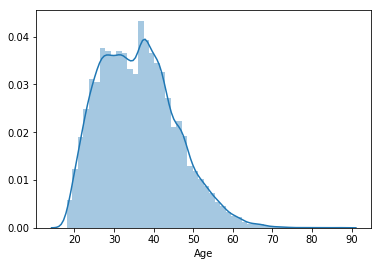

In [293]:
sns.distplot(a = data.Age.dropna())

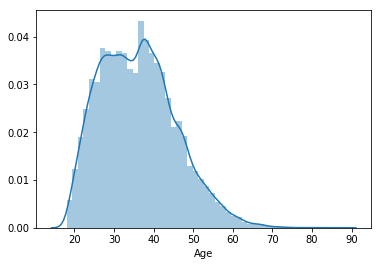

In [294]:
data.Age.fillna(data.Age.mean(), inplace=True)
sns.distplot(a = data.Age)

In [295]:
data.Verification.unique()

array(['Non_Verified', 'Verified'], dtype=object)